In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive



# Exploratory Data Analysis

Exploratory Data Analysis merupakan pendekatan untuk  memahami isi data yang digunakan, mulai dari distribusi, frekuensi, dan analisis korelasi. Pada pengerjaan proyek ini proses EDA yang dilakukan adalah analisis Distribusi data dengan mencek nilai mean, median dan modus untuk melihat distribusi data.

In [2]:
import pandas as pd
data_train = pd.read_csv('/content/drive/My Drive/TA_01/Dataset/data_train_loans.csv', delimiter=',', index_col=0)
data_test = pd.read_csv('/content/drive/My Drive/TA_01/Dataset/data_test_loans.csv', delimiter=',', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [82]:
missing_values_table(data_train)

Your selected dataframe has 56 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values,type
emp_title,98145,6.3,object
emp_length,92503,5.9,object
total_rev_hi_lim,52762,3.4,float64
tot_cur_bal,52762,3.4,float64
tot_coll_amt,52762,3.4,float64
title,35077,2.2,object
last_pymnt_d,6489,0.4,datetime64[ns]
revol_util,941,0.1,float64
dti,256,0.0,float64
collections_12_mths_ex_med,109,0.0,float64


In [0]:
num_attr = ['dti','inq_last_6mths','installment','int_rate','loan_amnt','open_acc','out_prncp','revol_bal','annual_inc',
            'revol_util','tot_cur_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_prncp','funded_amnt']
     
cat_attr = ['application_type','emp_length','emp_title','grade','home_ownership','initial_list_status','loan_status',
            'purpose','pymnt_plan','sub_grade','term','title','verification_status','state_code','state']
date_attr =['earliest_cr_line','issue_d','last_credit_pull_d','last_pymnt_d']

In [6]:
data_train[num_attr].describe().T

,count,mean,std,min,25%,50%,75%,max
dti,1560633.0,18.909529,56.874717,-1.00,12.11,17.950000,24.44,9.999000e+03
inq_last_6mths,1560870.0,0.609577,0.917494,0.00,0.00,0.000000,1.00,3.300000e+01
installment,1560889.0,440.300471,261.626660,15.69,251.01,376.760000,582.17,1.719830e+03
int_rate,1560889.0,13.182955,4.753882,5.32,9.75,12.740000,15.80,3.099000e+01
loan_amnt,1560889.0,14730.976946,8844.087962,500.00,8000.00,12525.000000,20000.00,4.000000e+04
open_acc,1560871.0,11.714187,5.584035,0.00,8.00,11.000000,15.00,9.700000e+01
out_prncp,1560889.0,7449.866593,8133.045674,0.00,0.00,5132.960000,11946.35,4.156034e+04
revol_bal,1560889.0,16861.948362,23151.025545,0.00,6156.00,11470.000000,20369.00,2.904836e+06
annual_inc,1560887.0,77737.956290,122108.226222,0.00,47000.00,65000.000000,92475.00,1.100000e+08
revol_util,1559948.0,52.276870,24.203129,0.00,34.10,52.500000,70.90,3.666000e+02


In [0]:
data_train[num_attr]

In [0]:
data_train[cat_attr]

In [0]:
data_train[date_attr]

In [0]:
data_train['loan_status'] = data_train['loan_status'].replace(['Fully Paid','Does not meet the credit policy. Status:Fully Paid'], 'Fully Paid')
data_train['loan_status'] = data_train['loan_status'].replace(['Charged Off','In Grace Period', 'Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)','Late (16-30 days)','Issued'], 'Charged Off')

In [8]:
import seaborn
#Exploring the loan_status x purpose
purp_loan= ['purpose', 'loan_status']
cm = seaborn.light_palette("green", as_cmap=True)
(round(pd.crosstab(data_train[purp_loan[0]], data_train[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,0.83,1.04,1.29
credit_card,17.87,22.8,21.08
debt_consolidation,61.58,57.26,58.03
educational,0.04,0,0.06
home_improvement,5.86,6.9,6.74
house,0.57,0.37,0.59
major_purchase,2.11,2.13,2.39
medical,1.27,1.18,1.08
moving,0.88,0.67,0.74


In [9]:

loan_grade = ['loan_status', 'grade']
cm = seaborn.light_palette("green", as_cmap=True)
pd.crosstab(data_train[loan_grade[0]], data_train[loan_grade[1]]).style.background_gradient(cmap = cm)


grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7995,29249,46859,34572,21201,9330,2907
Current,177072,310973,312600,131973,57292,17257,4979
Fully Paid,72642,124609,107797,56095,24578,8611,2298


In [10]:
loan_grade = ['loan_status', 'grade']
cm = seaborn.light_palette("green", as_cmap=True)
round(pd.crosstab(data_train[loan_grade[0]], data_train[loan_grade[1]], 
            values=data_train['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7.42,10.88,14.1,17.7,21.02,24.74,27.38
Current,6.95,10.32,13.85,17.89,21.75,25.78,28.94
Fully Paid,7.27,10.99,14.19,17.68,20.88,24.32,26.77


In [11]:
loan_verification = ['loan_status', 'verification_status']
cm = seaborn.light_palette("green", as_cmap=True)
pd.crosstab(data_train[loan_verification[0]], data_train[loan_verification[1]], 
            normalize='index').style.background_gradient(cmap = cm)

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,0.231164,0.385437,0.383399
Current,0.316683,0.401927,0.28139
Fully Paid,0.333079,0.342612,0.32431


In [12]:
loan_application = ['loan_status', 'application_type']
cm = seaborn.light_palette("green", as_cmap=True)
pd.crosstab(data_train[loan_application[0]], data_train[loan_application[1]]).style.background_gradient(cmap = cm)

application_type,DIRECT_PAY,INDIVIDUAL,Individual,JOINT,Joint App
loan_status,,,,,
Charged Off,232,104056,46083,364,1378
Current,1764,579652,402550,6260,21920
Fully Paid,170,298062,95804,344,2250


In [13]:
loan_grade = ['sub_grade', 'grade']
cm = seaborn.light_palette("green", as_cmap=True)
round(pd.crosstab(data_train[loan_grade[0]], data_train[loan_grade[1]], 
            values=data_train['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
sub_grade,,,,,,,
A1,5.44,0,0,0,0,0,0
A2,6.64,0,0,0,0,0,0
A3,7.16,0,0,0,0,0,0
A4,7.51,0,0,0,0,0,0
A5,8.16,0,0,0,0,0,0
B1,0,8.76,0,0,0,0,0
B2,0,9.8,0,0,0,0,0
B3,0,10.62,0,0,0,0,0
B4,0,11.32,0,0,0,0,0


Berikut ini adalah jumlah loan status berdasarkan state dari peminjam

In [14]:
#Exploring the State Adress x Loan Status
adress_loan = ['state', 'loan_status']
cm = seaborn.light_palette("green", as_cmap=True)
round(pd.crosstab(data_train[adress_loan[0]], 
                  data_train[adress_loan[1]], 
                  normalize='all')*100,2).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Fully Paid
state,,,
Alabama,0.15,0.78,0.3
Alaska,0.02,0.15,0.07
Arizona,0.23,1.5,0.64
Arkansas,0.08,0.5,0.17
California,1.4,8.45,4.01
Colorado,0.17,1.27,0.63
Connecticut,0.13,1.08,0.36
Delaware,0.03,0.19,0.07
DistrictofColumbia,0.02,0.15,0.08


In [0]:
data_train[date_attr] = data_train[date_attr].astype('datetime64')

Untuk melihat persebaran status peminjaman  current, Charged of dan Fully Paid maka di kalkulasikan dengan issue_d - earliest_cr_line

In [0]:
data_train['earliest_cr_line'] = data_train['earliest_cr_line'].fillna(method='ffill').fillna(method='bfill')

In [0]:
#curr_time= pd.to_datetime("now")
data_train['loan_difference'] = data_train['issue_d'] - data_train['earliest_cr_line']
data_train['loan_difference'] = data_train['loan_difference'] / 365
data_train['loan_difference'] = data_train['loan_difference'].dt.days

In [0]:
def extract_year_month_issue_d(df, datetime_column):
   
    df['year_issue_d'] = df[datetime_column].dt.year
    df['month_issue_d'] = df[datetime_column].dt.month
    df['dayOF_issue_d'] = df[datetime_column].dt.dayofweek

In [0]:
extract_year_month_issue_d(data_train, 'issue_d')

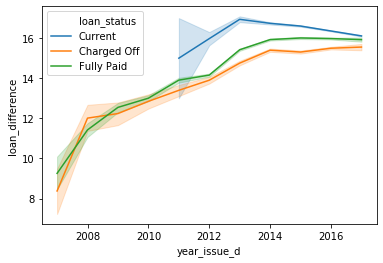

In [20]:
ax = seaborn.lineplot(x="year_issue_d", y="loan_difference", hue="loan_status",data=data_train)

In [0]:
data_current = data_train.query('loan_status == "Current"')

In [22]:
data_train['loan_status'].unique()

array(['Current', 'Charged Off', 'Fully Paid'], dtype=object)

Berikut ini adalah Bar Chart yang menunjukkan perbedaan persentase loan status. Dari grafik tersebut terlihat peminjam dengan status charged off 9.75 %, maka hal ini yang perlu dipertimbangkan untuk diberikan pinjaman selanjutnya.

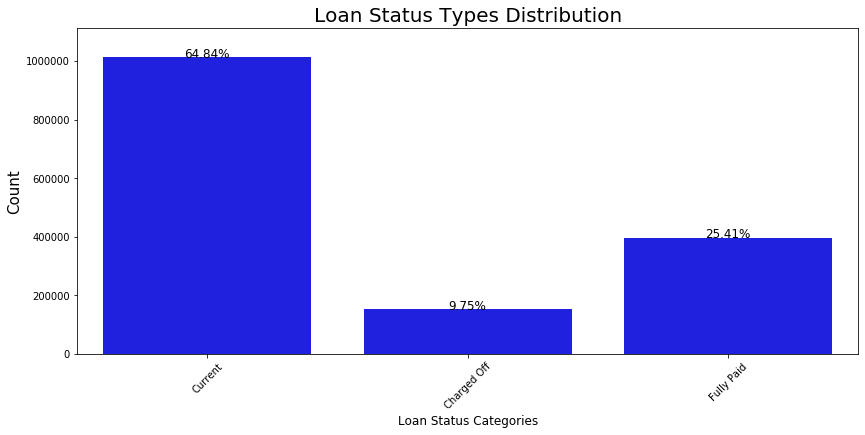

In [23]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
total = len(data_train)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=data_train, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

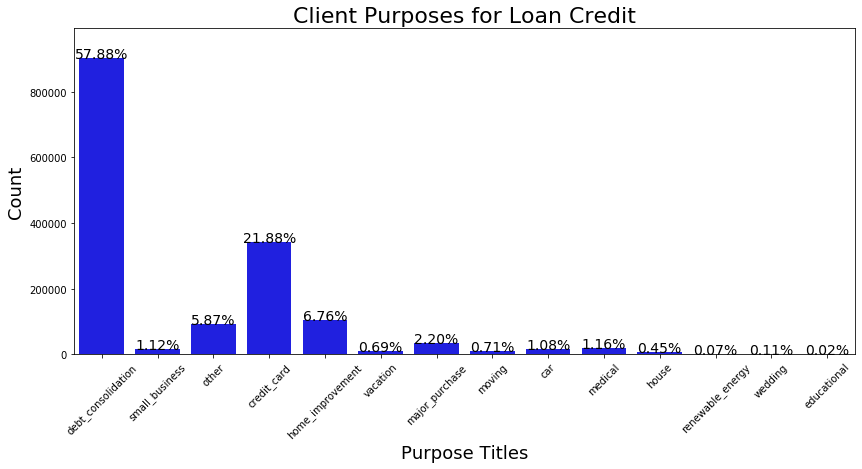

In [24]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=data_train, 
                  color='blue')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()

In [0]:
df_loan = data_train.loc[data_train['loan_status'].isin(['Fully Paid', 'Charged Off'])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


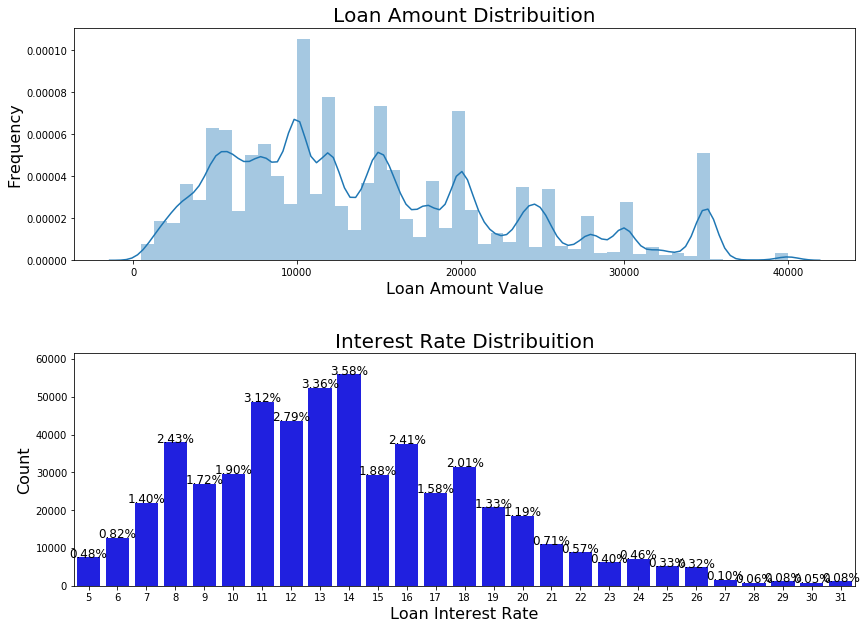

In [26]:
df_loan['int_round'] = df_loan['int_rate'].round(0).astype(int)

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(df_loan["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_round", data=df_loan, 
                  color='blue')
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

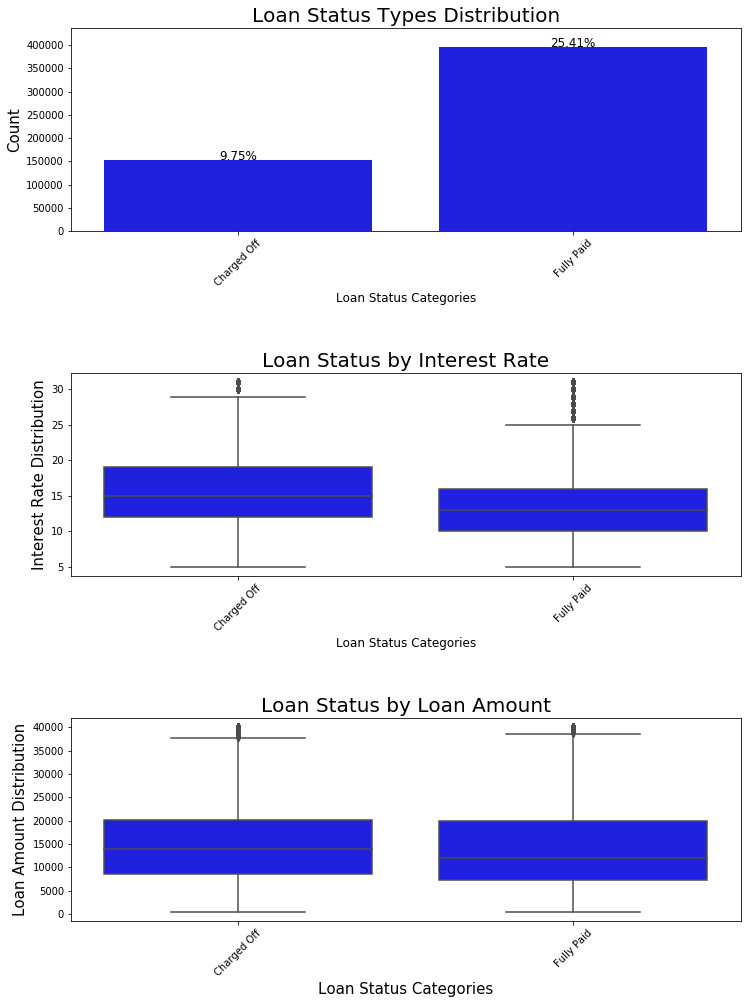

In [27]:
plt.figure(figsize = (12,16))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df_loan, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(312)
g1 = sns.boxplot(x="loan_status", y="int_round", data=df_loan, 
                 color='blue')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Status Categories", fontsize=12)
g1.set_ylabel("Interest Rate Distribution", fontsize=15)
g1.set_title("Loan Status by Interest Rate", fontsize=20)

plt.subplot(313)
g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=df_loan, 
                 color='blue')
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Loan Status Categories", fontsize=15)
g2.set_ylabel("Loan Amount Distribution", fontsize=15)
g2.set_title("Loan Status by Loan Amount", fontsize=20)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

In [0]:
list_float = data_train.select_dtypes(exclude=['object']).columns

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
cm_df = seaborn.heatmap(data_train[list_float].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)
plt.savefig('korelasi.png')

In [0]:
data_train[attr_cat]

In [0]:
data_train[attr_num]

In [0]:
data_train[attr_date]

In [0]:
data_train.isnull().sum()

In [0]:
data_train[attr_num].describe().T

Untuk memeriksa outlier dapat menggunakan diagram boxplot dan untuk persebaran data menggunakan histogram. Apabila terdapat nilai NaN maka data outlier tidak dapat ditunjukkan.

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e5db2898>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e5ca3390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e5ca3d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e5ca3a20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e5db2c50>,
  <matplotlib.lines.Line2D at 0x7f02e5ca3048>]}

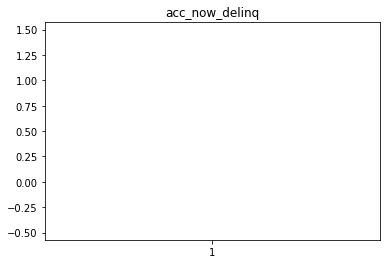

In [33]:
fig1, ax1 = plt.subplots()
ax1.set_title('acc_now_delinq')
ax1.boxplot(data_train["acc_now_delinq"])

In [0]:
data_train[attr_num].dtypes

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e5bf9400>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e5bf9e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e5c06898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e5c06550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e5bf9780>,
  <matplotlib.lines.Line2D at 0x7f02e5bf9b38>]}

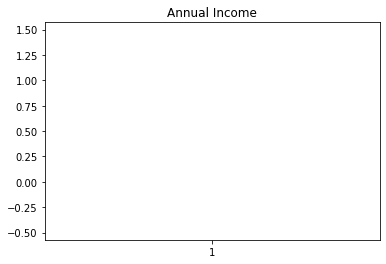

In [34]:
fig1, ax1 = plt.subplots()
ax1.set_title('Annual Income')
ax1.boxplot(data_train["annual_inc"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e5d14cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e5c370b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e5dd63c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e8b74ac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e625a390>,
  <matplotlib.lines.Line2D at 0x7f02e5dc9d30>]}

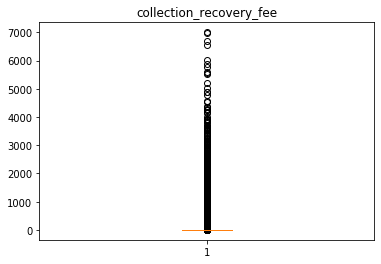

In [35]:
fig1, ax1 = plt.subplots()
ax1.set_title('collection_recovery_fee')
ax1.boxplot(data_train["collection_recovery_fee"])

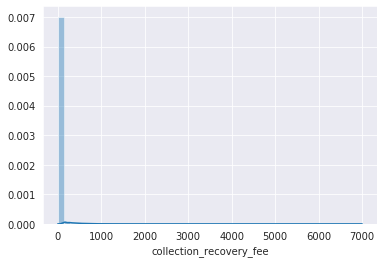

In [36]:
sns.set_style('darkgrid')
sns.distplot(data_train["collection_recovery_fee"])


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e5a95d30>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e5aa1898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e5aa8358>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e5aa1f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e5aa1128>,
  <matplotlib.lines.Line2D at 0x7f02e5aa1518>]}

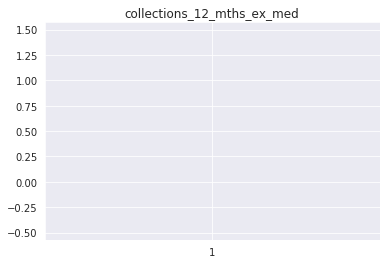

In [37]:
fig1, ax1 = plt.subplots()
ax1.set_title('collections_12_mths_ex_med')
ax1.boxplot(data_train["collections_12_mths_ex_med"])

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e5a70da0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e5a7e6d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e5a08198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e5a7edd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e5a70f28>,
  <matplotlib.lines.Line2D at 0x7f02e5a7e358>]}

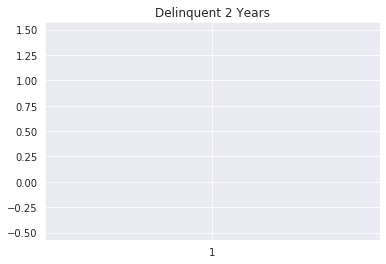

In [38]:
fig1, ax1 = plt.subplots()
ax1.set_title('Delinquent 2 Years')
ax1.boxplot(data_train["delinq_2yrs"])

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e59d1c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e59dd588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e59e5048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e59ddc88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e59d1dd8>,
  <matplotlib.lines.Line2D at 0x7f02e59dd208>]}

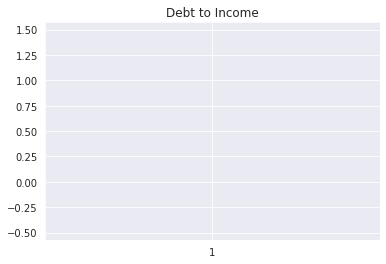

In [39]:
fig1, ax1 = plt.subplots()
ax1.set_title('Debt to Income')
ax1.boxplot(data_train["dti"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e59ac9e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e59b9320>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e59b9da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e59b9a20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e59acb70>,
  <matplotlib.lines.Line2D at 0x7f02e59acf60>]}

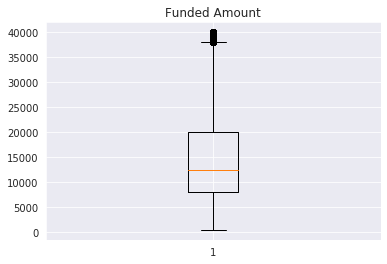

In [40]:
fig1, ax1 = plt.subplots()
ax1.set_title('Funded Amount')
ax1.boxplot(data_train["funded_amnt"])

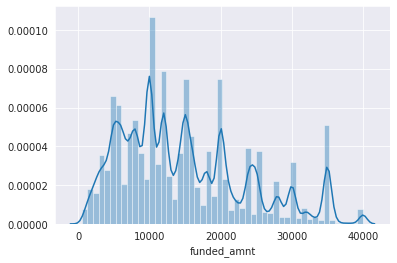

In [41]:
sns.set_style('darkgrid')
sns.distplot(data_train["funded_amnt"])


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e5855f60>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e5861898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e5868358>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e5861f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e5861128>,
  <matplotlib.lines.Line2D at 0x7f02e5861518>]}

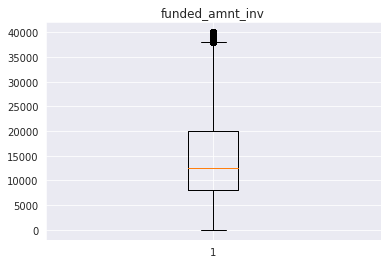

In [42]:
fig1, ax1 = plt.subplots()
ax1.set_title('funded_amnt_inv')
ax1.boxplot(data_train["funded_amnt_inv"])

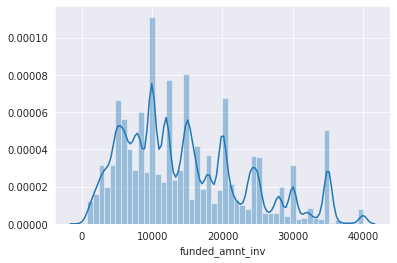

In [43]:
sns.set_style('darkgrid')
sns.distplot(data_train["funded_amnt_inv"])


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e57116a0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e5711f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e571a9e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e571a668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e5711828>,
  <matplotlib.lines.Line2D at 0x7f02e5711ba8>]}

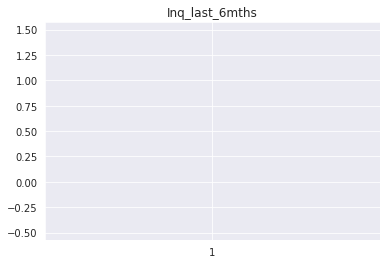

In [44]:
fig1, ax1 = plt.subplots()
ax1.set_title('Inq_last_6mths')
ax1.boxplot(data_train["inq_last_6mths"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e56f7438>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e56f7d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e57037f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e5703470>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e56f75c0>,
  <matplotlib.lines.Line2D at 0x7f02e56f79b0>]}

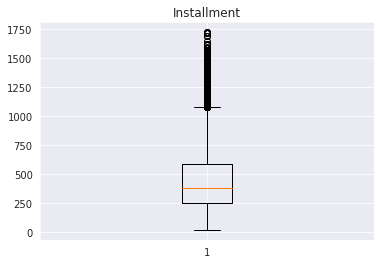

In [45]:
fig1, ax1 = plt.subplots()
ax1.set_title('Installment')
ax1.boxplot(data_train["installment"])

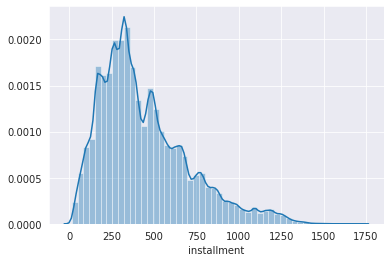

In [46]:
sns.set_style('darkgrid')
sns.distplot(data_train["installment"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e55c1f98>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e554d8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e5556390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e554dfd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e554d160>,
  <matplotlib.lines.Line2D at 0x7f02e554d550>]}

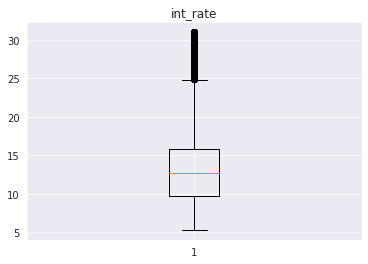

In [47]:
fig1, ax1 = plt.subplots()
ax1.set_title('int_rate')
ax1.boxplot(data_train["int_rate"])

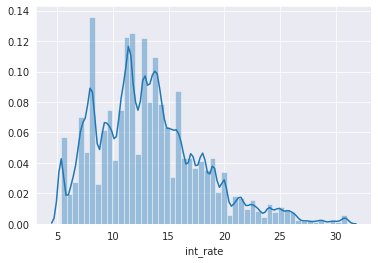

In [48]:
sns.set_style('darkgrid')
sns.distplot(data_train["int_rate"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e5482f60>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e540e898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e541a358>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e540ef98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e540e128>,
  <matplotlib.lines.Line2D at 0x7f02e540e518>]}

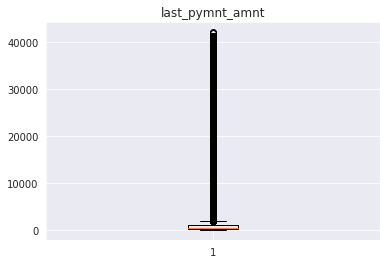

In [49]:
fig1, ax1 = plt.subplots()
ax1.set_title('last_pymnt_amnt')
ax1.boxplot(data_train["last_pymnt_amnt"])

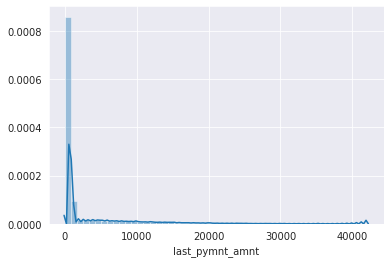

In [50]:
sns.set_style('darkgrid')
sns.distplot(data_train["last_pymnt_amnt"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e53439e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e52cf320>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e52cfda0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e52cfa20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e5343b70>,
  <matplotlib.lines.Line2D at 0x7f02e5343f60>]}

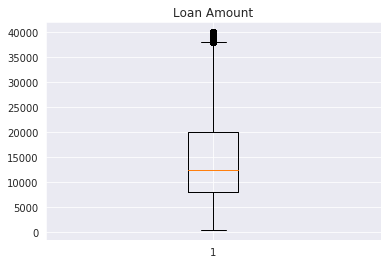

In [51]:
fig1, ax1 = plt.subplots()
ax1.set_title('Loan Amount')
ax1.boxplot(data_train["loan_amnt"])

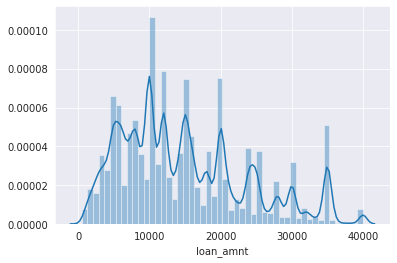

In [52]:
sns.set_style('darkgrid')
sns.distplot(data_train["loan_amnt"])

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e5206e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e5192978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e519b438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e519b0b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e5192208>,
  <matplotlib.lines.Line2D at 0x7f02e51925f8>]}

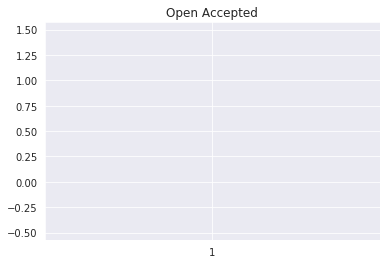

In [53]:
fig1, ax1 = plt.subplots()
ax1.set_title('Open Accepted')
ax1.boxplot(data_train["open_acc"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e516ae80>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e51787b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e5182278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e5178eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e5178048>,
  <matplotlib.lines.Line2D at 0x7f02e5178438>]}

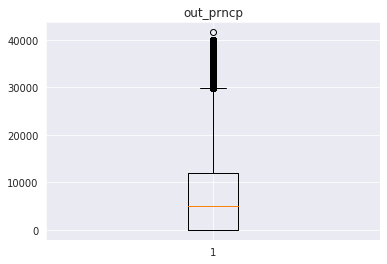

In [54]:
fig1, ax1 = plt.subplots()
ax1.set_title('out_prncp')
ax1.boxplot(data_train["out_prncp"])

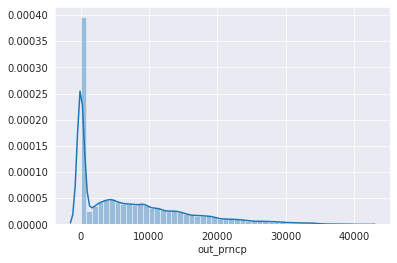

In [55]:
sns.set_style('darkgrid')
sns.distplot(data_train["out_prncp"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e5032f98>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e50418d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e4fc8390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e5041fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e5041160>,
  <matplotlib.lines.Line2D at 0x7f02e5041550>]}

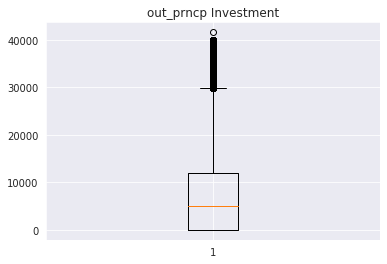

In [56]:
fig1, ax1 = plt.subplots()
ax1.set_title('out_prncp Investment')
ax1.boxplot(data_train["out_prncp_inv"])

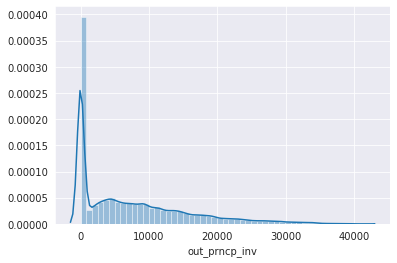

In [57]:
sns.set_style('darkgrid')
sns.distplot(data_train["out_prncp_inv"])

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e4ef6f28>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e4f00a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e4e8c550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e4e8c1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e4f00320>,
  <matplotlib.lines.Line2D at 0x7f02e4f00710>]}

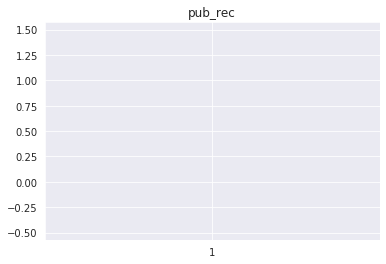

In [58]:
fig1, ax1 = plt.subplots()
ax1.set_title('pub_rec')
ax1.boxplot(data_train["pub_rec"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e4e5df28>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e4e6a860>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e4e74320>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e4e6af60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e4e6a0f0>,
  <matplotlib.lines.Line2D at 0x7f02e4e6a4e0>]}

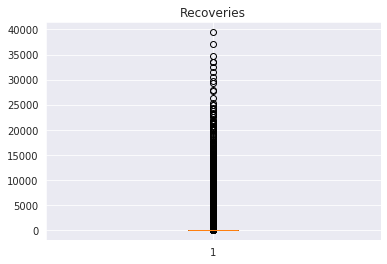

In [59]:
fig1, ax1 = plt.subplots()
ax1.set_title('Recoveries')
ax1.boxplot(data_train["recoveries"])

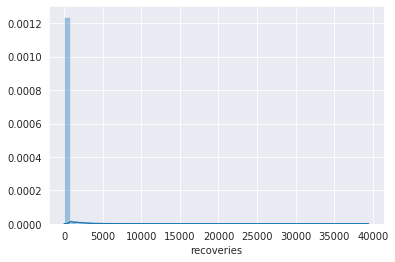

In [60]:
sns.set_style('darkgrid')
sns.distplot(data_train["recoveries"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e4d32eb8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e4d3f7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e4cc82b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e4d3fef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e4d3f080>,
  <matplotlib.lines.Line2D at 0x7f02e4d3f470>]}

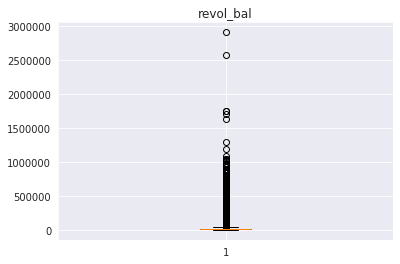

In [61]:
fig1, ax1 = plt.subplots()
ax1.set_title('revol_bal')
ax1.boxplot(data_train["revol_bal"])

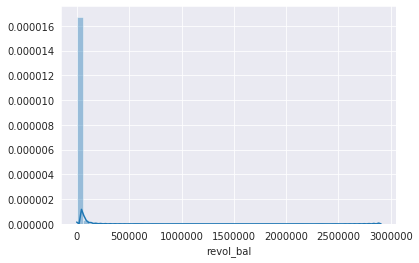

In [62]:
sns.set_style('darkgrid')
sns.distplot(data_train["revol_bal"])

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e4b8a048>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e4b8ab70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e4b96630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e4b962b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e4b8a400>,
  <matplotlib.lines.Line2D at 0x7f02e4b8a7f0>]}

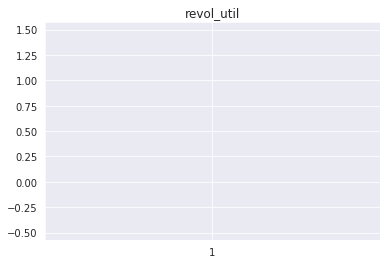

In [63]:
fig1, ax1 = plt.subplots()
ax1.set_title('revol_util')
ax1.boxplot(data_train["revol_util"])

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e4b65e80>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e4b719e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e4b7e4a8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e4b7e128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e4b71278>,
  <matplotlib.lines.Line2D at 0x7f02e4b71668>]}

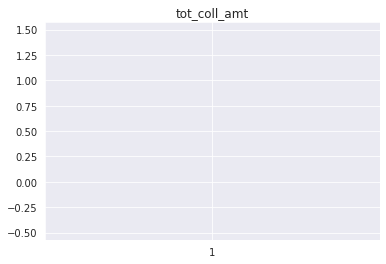

In [64]:
fig1, ax1 = plt.subplots()
ax1.set_title('tot_coll_amt')
ax1.boxplot(data_train["tot_coll_amt"])

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e4ad1d68>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e4adf8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e4ae9390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e4adffd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e4adf160>,
  <matplotlib.lines.Line2D at 0x7f02e4adf550>]}

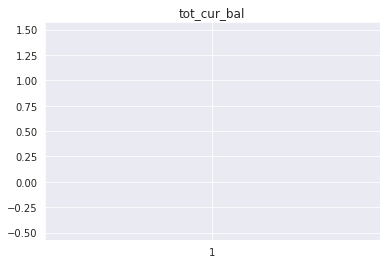

In [65]:
fig1, ax1 = plt.subplots()
ax1.set_title('tot_cur_bal')
ax1.boxplot(data_train["tot_cur_bal"])

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e4abb3c8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e4abbef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e4ac79b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e4ac7630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e4abb780>,
  <matplotlib.lines.Line2D at 0x7f02e4abbb70>]}

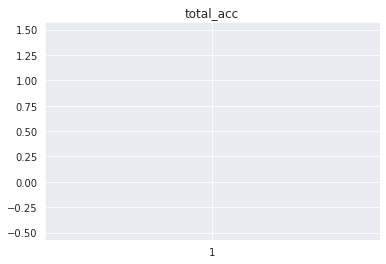

In [66]:
fig1, ax1 = plt.subplots()
ax1.set_title('total_acc')
ax1.boxplot(data_train["total_acc"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e4a26400>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e4a26cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e4a317b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e4a31438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e4a26588>,
  <matplotlib.lines.Line2D at 0x7f02e4a26978>]}

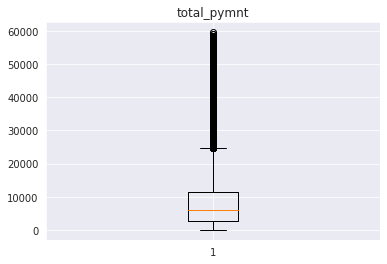

In [67]:
fig1, ax1 = plt.subplots()
ax1.set_title('total_pymnt')
ax1.boxplot(data_train["total_pymnt"])

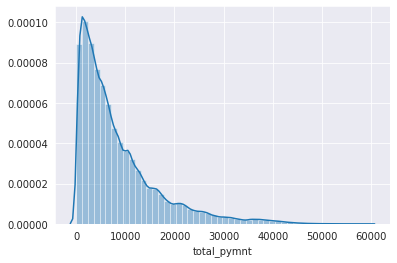

In [68]:
sns.set_style('darkgrid')
sns.distplot(data_train["total_pymnt"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e48e99b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e48f62e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e48f6d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e48f69e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e48e9b38>,
  <matplotlib.lines.Line2D at 0x7f02e48e9f28>]}

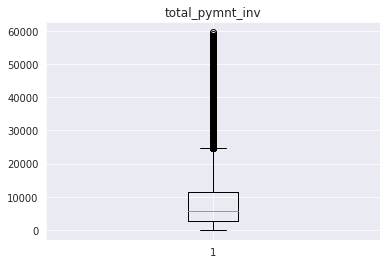

In [69]:
fig1, ax1 = plt.subplots()
ax1.set_title('total_pymnt_inv')
ax1.boxplot(data_train["total_pymnt_inv"])

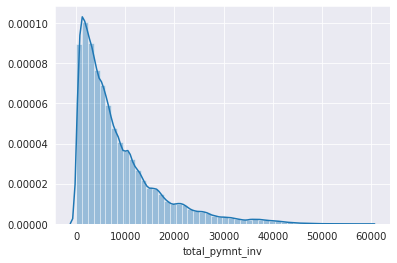

In [70]:
sns.set_style('darkgrid')
sns.distplot(data_train["total_pymnt_inv"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e47abfd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e47b8908>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e47bf3c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e47bf048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e47b8198>,
  <matplotlib.lines.Line2D at 0x7f02e47b8588>]}

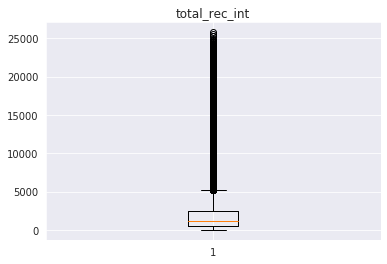

In [71]:
fig1, ax1 = plt.subplots()
ax1.set_title('total_rec_int')
ax1.boxplot(data_train["total_rec_int"])

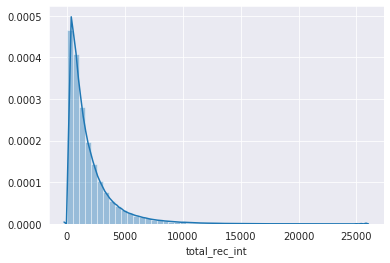

In [72]:
sns.set_style('darkgrid')
sns.distplot(data_train["total_rec_int"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e466ebe0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e467c518>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e467cf98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e467cc18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e466ed68>,
  <matplotlib.lines.Line2D at 0x7f02e467c198>]}

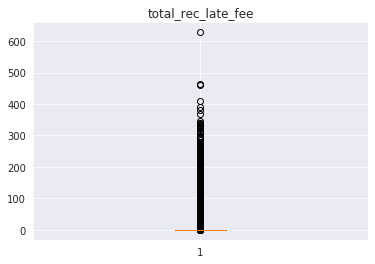

In [73]:
fig1, ax1 = plt.subplots()
ax1.set_title('total_rec_late_fee')
ax1.boxplot(data_train["total_rec_late_fee"])

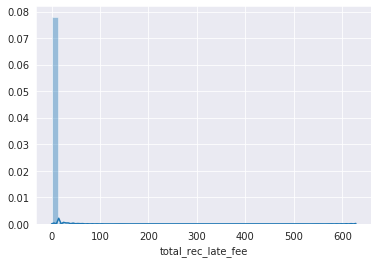

In [74]:
sns.set_style('darkgrid')
sns.distplot(data_train["total_rec_late_fee"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f02e4544160>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e4544a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e44cf518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e44cf198>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e45442e8>,
  <matplotlib.lines.Line2D at 0x7f02e45446d8>]}

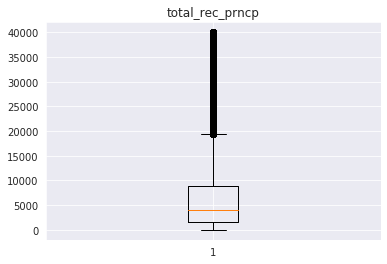

In [75]:
fig1, ax1 = plt.subplots()
ax1.set_title('total_rec_prncp')
ax1.boxplot(data_train["total_rec_prncp"])

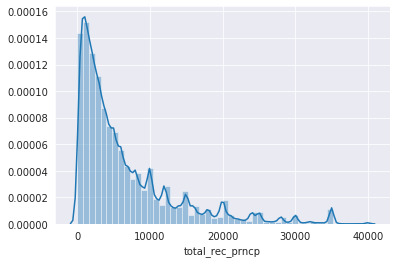

In [76]:
sns.set_style('darkgrid')
sns.distplot(data_train["total_rec_prncp"])

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7f02e43904e0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02e439a048>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02e439aac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f02e439a748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02e4390898>,
  <matplotlib.lines.Line2D at 0x7f02e4390c88>]}

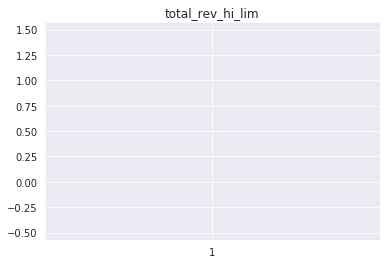

In [77]:
fig1, ax1 = plt.subplots()
ax1.set_title('total_rev_hi_lim')
ax1.boxplot(data_train["total_rev_hi_lim"])

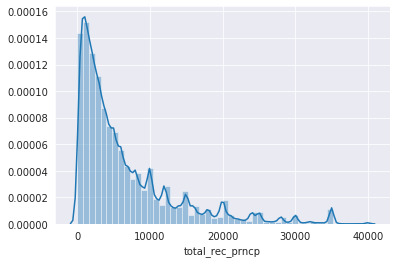

In [78]:
sns.set_style('darkgrid')
sns.distplot(data_train["total_rec_prncp"])

In [0]:
  # make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(data_train.loc[data_train[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data_train[col_name], order=sorted(data_train[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=data_train, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = data_train.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(data_train, hue = 'loan_status', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(30,3))
        sns.countplot(x=col_name, hue='loan_status', data=data_train, order=sorted(data_train[col_name].unique()) )
     
    plt.tight_layout()


In [80]:
data_train[attr_cat].columns

NameError: ignored

In [0]:
plot_var('grade', 'Application Status', continuous=False)

In [0]:
plot_var('application_type', 'Application Status', continuous=False)

In [0]:
data_train.isnull().sum()